# **Import librares**

In [16]:
!pip install Keras-Preprocessing
!pip install ktrain
import numpy as np
import pandas as pd
import nltk
import tensorflow as tf
import matplotlib.pyplot as plot
import seaborn as sns
import plotly.express as px
import pickle
import joblib
import urllib
import requests
import ktrain
from nltk.corpus import stopwords
from nltk.corpus import reuters
from nltk.corpus import brown
from nltk.corpus import gutenberg
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from textblob import Word 
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras_preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense, Embedding, LSTM, SpatialDropout1D, Dropout, Flatten, GRU, Conv1D, MaxPooling1D, Bidirectional
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
from keras.regularizers import l2
from ktrain import text
sns.set()
%matplotlib inline
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('gutenberg')
nltk.download('brown')
nltk.download("reuters")
nltk.download('words')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

### **Load Dataset**

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
dataFrame=pd.read_csv("/content/drive/MyDrive/nlp_project/Suicide_Detection.csv", engine='python', encoding='UTF-8')
dataFrame

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...,...
232069,348103,If you don't like rock then your not going to ...,non-suicide
232070,348106,You how you can tell i have so many friends an...,non-suicide
232071,348107,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,348108,The usual stuff you find hereI'm not posting t...,suicide


# **Data Cleaning**

In [19]:
dataFrame['text']=dataFrame['text'].fillna("") 
dataFrame.isna().sum()

Unnamed: 0    0
text          0
class         0
dtype: int64

# **Preprocessing**

In [20]:
#Lower Case Conversion
dataFrame['lower_case_text']= dataFrame['text'].apply(lambda x: x.lower())

# Tokenization
regExTokenizer = RegexpTokenizer(r'\w+')
dataFrame['tokens'] = dataFrame.apply(lambda row: regExTokenizer.tokenize(row['lower_case_text']), axis=1)  

# Stop Words Removal
stop_words = set(stopwords.words('english'))
stop_words.remove('not')
stop_words.remove('here')
stop_words.remove('some')
dataFrame['stop_words_removed'] = dataFrame['tokens'].apply(lambda x: [word for word in x if word not in stop_words])
dataFrame['stop_words_removed'] = dataFrame['stop_words_removed'].astype('str')

# Length based Filtering
dataFrame['short_word'] = dataFrame['stop_words_removed'].str.findall('\w{3,}')
dataFrame['string']=dataFrame['short_word'].str.join(' ') 

# Non-English Words Removal
english_words = set(nltk.corpus.words.words())
for word in reuters.words():
    english_words.add(word)
for word in brown.words():
    english_words.add(word)
for word in gutenberg.words():
    english_words.add(word)
dataFrame['english_only'] = dataFrame['string'].apply(lambda x: " ".join(word for word in x.split() if word in english_words))

# Lemmatization
dataFrame['text'] = dataFrame['english_only'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [21]:
dataFrame.head(10)

,Unnamed: 0,text,class,lower_case_text,tokens,stop_words_removed,short_word,string,english_only
0,2,wife threatening left wife good cheated twice ...,suicide,ex wife threatening suiciderecently i left my ...,"[ex, wife, threatening, suiciderecently, i, le...","['ex', 'wife', 'threatening', 'suiciderecently...","[wife, threatening, suiciderecently, left, wif...",wife threatening suiciderecently left wife goo...,wife threatening left wife good cheated twice ...
1,3,weird get affected compliment coming someone k...,non-suicide,am i weird i don't get affected by compliments...,"[am, i, weird, i, don, t, get, affected, by, c...","['weird', 'get', 'affected', 'compliments', 'c...","[weird, get, affected, compliments, coming, so...",weird get affected compliments coming someone ...,weird get affected compliments coming someone ...
2,4,finally almost never hear bad year ever swear ...,non-suicide,finally 2020 is almost over... so i can never ...,"[finally, 2020, is, almost, over, so, i, can, ...","['finally', '2020', 'almost', 'never', 'hear',...","[finally, 2020, almost, never, hear, 2020, bad...",finally 2020 almost never hear 2020 bad year e...,finally almost never hear bad year ever swear ...
3,8,need help cry hard,suicide,i need helpjust help me im crying so hard,"[i, need, helpjust, help, me, im, crying, so, ...","['need', 'helpjust', 'help', 'im', 'crying', '...","[need, helpjust, help, crying, hard]",need helpjust help crying hard,need help crying hard
4,9,name struggling year afraid past year thought ...,suicide,"i’m so losthello, my name is adam (16) and i’v...","[i, m, so, losthello, my, name, is, adam, 16, ...","['losthello', 'name', 'adam', '16', 'strugglin...","[losthello, name, adam, struggling, years, afr...",losthello name adam struggling years afraid pa...,name struggling years afraid past years though...
5,11,dont know even here feel like nothing nowhere ...,suicide,honetly idki dont know what im even doing here...,"[honetly, idki, dont, know, what, im, even, do...","['honetly', 'idki', 'dont', 'know', 'im', 'eve...","[honetly, idki, dont, know, even, here, feel, ...",honetly idki dont know even here feel like not...,dont know even here feel like nothing nowhere ...
6,12,trigger warning excuse self inflicted burn kno...,suicide,[trigger warning] excuse for self inflicted bu...,"[trigger, warning, excuse, for, self, inflicte...","['trigger', 'warning', 'excuse', 'self', 'infl...","[trigger, warning, excuse, self, inflicted, bu...",trigger warning excuse self inflicted burns kn...,trigger warning excuse self inflicted burns kn...
7,13,end tonight anymore quit,suicide,it ends tonight.i can’t do it anymore. \ni quit.,"[it, ends, tonight, i, can, t, do, it, anymore...","['ends', 'tonight', 'anymore', 'quit']","[ends, tonight, anymore, quit]",ends tonight anymore quit,ends tonight anymore quit
8,16,everyone want edgy making self conscious feel ...,non-suicide,"everyone wants to be ""edgy"" and it's making me...","[everyone, wants, to, be, edgy, and, it, s, ma...","['everyone', 'wants', 'edgy', 'making', 'self'...","[everyone, wants, edgy, making, self, consciou...",everyone wants edgy making self conscious feel...,everyone wants edgy making self conscious feel...
9,18,life year year old balding male hairline trash...,suicide,my life is over at 20 years oldhello all. i am...,"[my, life, is, over, at, 20, years, oldhello, ...","['life', '20', 'years', 'oldhello', '20', 'yea...","[life, years, oldhello, year, old, balding, ma...",life years oldhello year old balding male hair...,life years year old balding male hairline tras...


# **BERT**

In [22]:
train_x_list, test_x_list, train_y_list, test_y_list = train_test_split(dataFrame['text'], dataFrame['class'], test_size=0.33, random_state=42)
train_x_list = train_x_list.tolist()
test_x_list = test_x_list.tolist()
train_y_list = train_y_list.tolist()
test_y_list = test_y_list.tolist()

classes = ['suicide', 'non-suicide']

In [23]:
(train_X,train_Y), (val_X,val_Y), preproc = text.texts_from_array(x_train=train_x_list, y_train=train_y_list,
                                                                       x_test=test_x_list, y_test=test_y_list,
                                                                       class_names=classes,
                                                                       preprocess_mode='bert',
                                                                       maxlen=140, 
                                                                       max_features=5000)

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


/usr/local/lib/python3.9/dist-packages/ktrain/utils.py:744: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  warnings.warn(


task: text classification


In [24]:
bert_model = text.text_classifier('bert', train_data=(train_X,train_Y), preproc=preproc)

Is Multi-Label? False
maxlen is 140


/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


done.


In [25]:
ktrain_learner = ktrain.get_learner(bert_model, train_data=(train_X,train_Y), 
                             val_data=(val_X,val_Y),
                             batch_size=32)
ktrain_learner.fit_onecycle(2e-5, 3)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/3
4860/4860 [==============================] - 5525s 1s/step - loss: 0.2183 - accuracy: 0.9128 - val_loss: 0.1973 - val_accuracy: 0.9241
Epoch 2/3
4860/4860 [==============================] - 5560s 1s/step - loss: 0.1516 - accuracy: 0.9437 - val_loss: 0.1565 - val_accuracy: 0.9410
Epoch 3/3
4860/4860 [==============================] - 5503s 1s/step - loss: 0.0866 - accuracy: 0.9688 - val_loss: 0.1721 - val_accuracy: 0.9418


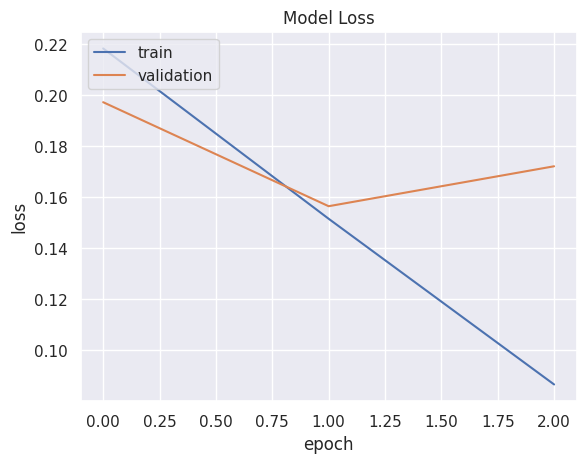

In [26]:
ktrain_learner.plot()

In [27]:
ktrain_learner.validate(val_data=(val_X,val_Y), class_names=classes)

2394/2394 [==============================] - 809s 336ms/step
              precision    recall  f1-score   support

     suicide       0.95      0.94      0.94     38326
 non-suicide       0.94      0.95      0.94     38259

    accuracy                           0.94     76585
   macro avg       0.94      0.94      0.94     76585
weighted avg       0.94      0.94      0.94     76585



array([[35917,  2409],
       [ 2049, 36210]])

In [28]:
pred = ktrain.get_predictor(ktrain_learner.model, preproc)
pred.get_classes()

['non-suicide', 'suicide']

In [45]:
msg = 'i will kill myself'
print('Post : {}'.format(msg))
pred_msg = pred.predict(msg)
print('Prediction : It is a {} post'.format(pred_msg))

Post : i will kill myself
Prediction : It is a suicide post


In [46]:
msg = 'i am happy today'
print('Post : {}'.format(msg))
pred_msg = pred.predict(msg)
print('Prediction : It is a {} post'.format(pred_msg))

Post : i am happy today
Prediction : It is a non-suicide post
